In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
weather_api_key = "596f5f3b9800586b144aabc52bf81db1"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [4]:
 # Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | pirapora
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | lorengau
Processing Record 5 of Set 1 | okahandja
Processing Record 6 of Set 1 | gabrovo
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | mejit
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | wenshui
Processing Record 12 of Set 1 | enewetak
Processing Record 13 of Set 1 | alofi
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | tolanaro
Processing Record 16 of Set 1 | yuzhno-kurilsk
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | beyneu
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | nemuro
Processing Record 21 of Set 1 | alice springs
Processing Record 22 of Set 1 | half moon bay
Processi

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,14.58,40,18,1.12,RU,1723170038
1,pirapora,-17.3450,-44.9419,20.17,50,0,0.29,BR,1723170039
2,invercargill,-46.4000,168.3500,8.90,77,1,2.68,NZ,1723170040
3,lorengau,-2.0226,147.2712,29.85,69,29,4.43,PG,1723170041
4,okahandja,-21.9833,16.9167,13.23,24,0,2.96,NA,1723170042


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("Resources/cities.csv", index_label="City_ID")

In [16]:

# Read saved data
city_data_df = pd.read_csv("Resources/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,14.58,40,18,1.12,RU,1723170038
1,pirapora,-17.3450,-44.9419,20.17,50,0,0.29,BR,1723170039
2,invercargill,-46.4000,168.3500,8.90,77,1,2.68,NZ,1723170040
3,lorengau,-2.0226,147.2712,29.85,69,29,4.43,PG,1723170041
4,okahandja,-21.9833,16.9167,13.23,24,0,2.96,NaN,1723170042


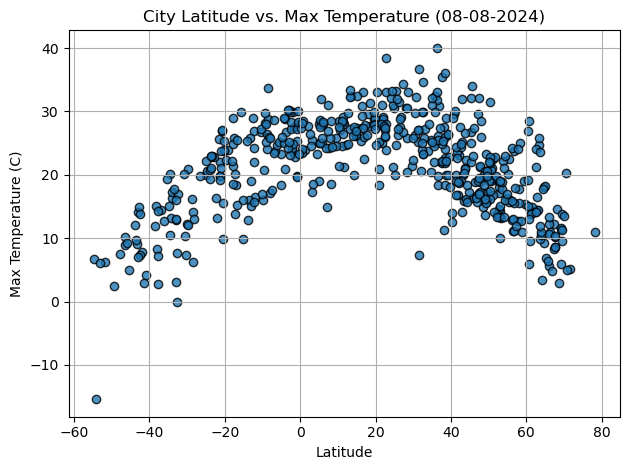

In [44]:

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties

date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.grid(True) 
plt.tight_layout()
# Save the figure
plt.savefig("Resources/Fig1.png")

# Show plot
plt.show()

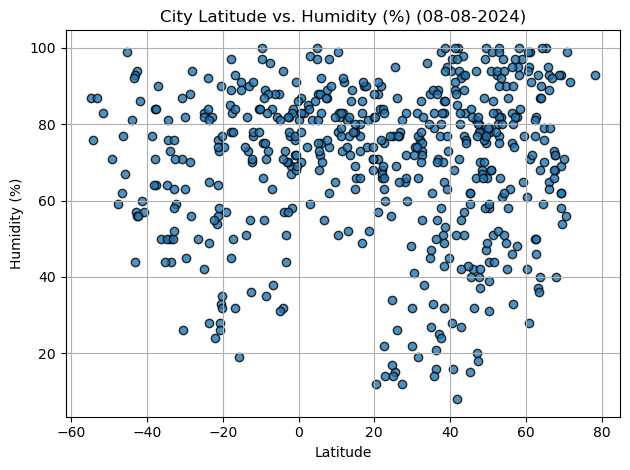

In [46]:

# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("Resources/Fig2.png")

# Show plot
plt.show()

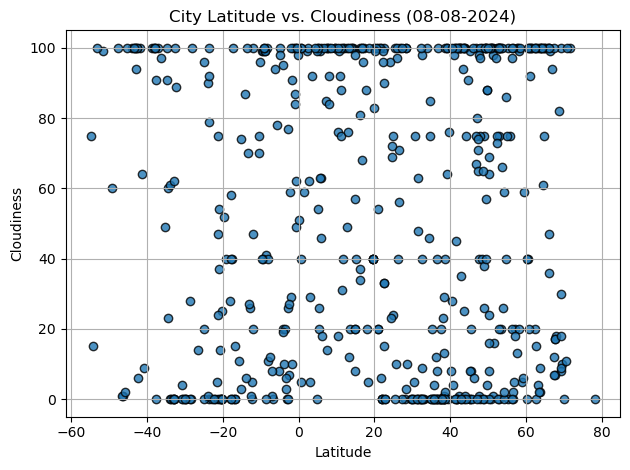

In [48]:

# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")


# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()
# Save the figure
plt.savefig("Resources/Fig3.png")

# Show plot
plt.show()

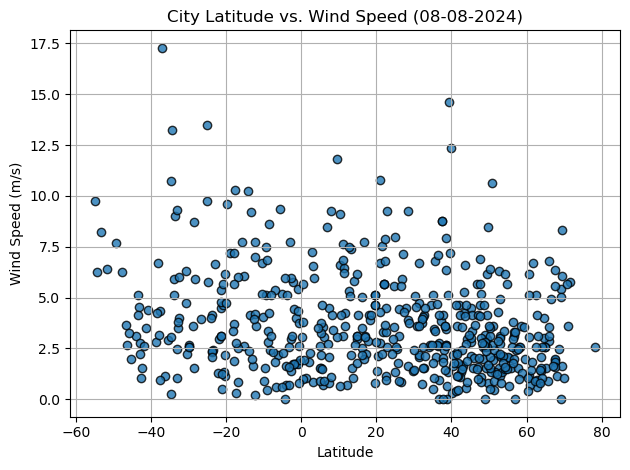

In [50]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("Resources/Fig4.png")

# Show plot
plt.show()

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,14.58,40,18,1.12,RU,1723170038
5,gabrovo,42.8747,25.3342,14.12,55,0,1.67,BG,1723170043
6,bethel,41.3712,-73.4140,19.94,89,100,3.60,US,1723170045
7,mejit,10.2753,170.8646,28.47,78,76,6.62,MH,1723170046
9,anadyr,64.7500,177.4833,9.28,70,75,4.00,RU,1723170048


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pirapora,-17.3450,-44.9419,20.17,50,0,0.29,BR,1723170039
2,invercargill,-46.4000,168.3500,8.90,77,1,2.68,NZ,1723170040
3,lorengau,-2.0226,147.2712,29.85,69,29,4.43,PG,1723170041
4,okahandja,-21.9833,16.9167,13.23,24,0,2.96,NaN,1723170042
8,hermanus,-34.4187,19.2345,13.22,76,23,13.25,ZA,1723170047


The r^2-value is -0.6645495457189008


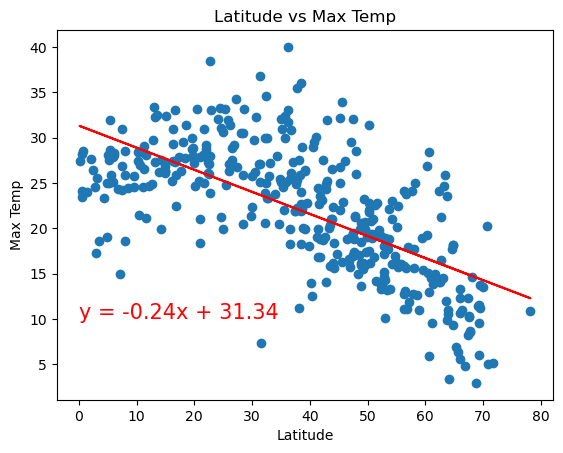

In [68]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r^2-value is {rvalue}')


The r^2-value is 0.7898056793045299
--------------------------
Discussion about the linear relationship:
 In the Southern Hemisphere there is a positive but relatively minimal relationship between the max temperatures and latitide since the max temperature increases as the distance to the equator decreases.


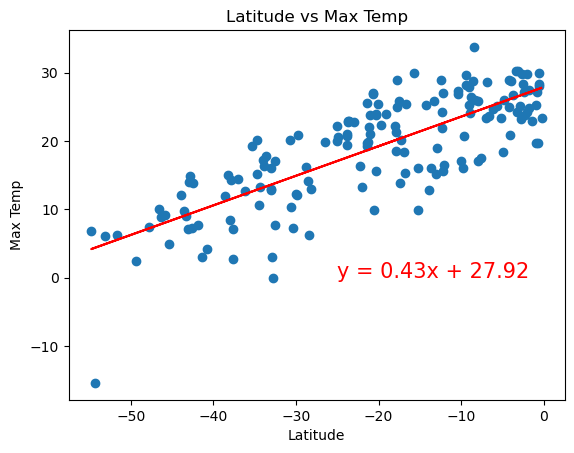

In [72]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,0),fontsize=15,color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r^2-value is {rvalue}')
print("--------------------------")
print("Discussion about the linear relationship:")
print(" In the Southern Hemisphere there is a positive but relatively minimal relationship between the max temperatures and latitide since the max temperature increases as the distance to the equator decreases.") 

The r^2-value is -0.035023041778432795


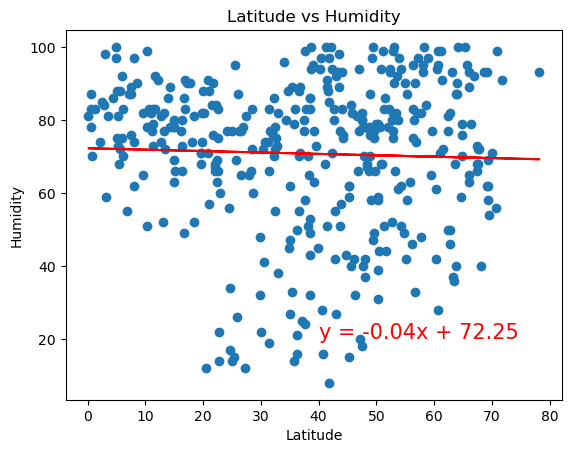

In [76]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r^2-value is {rvalue}')

The r^2-value is 0.04157492697982007
-----------------------------------
Discussion about linear relationship:
In the Southern Hemisphere there is a slightly positive relationship as humidity increases as latitude reaches 0.


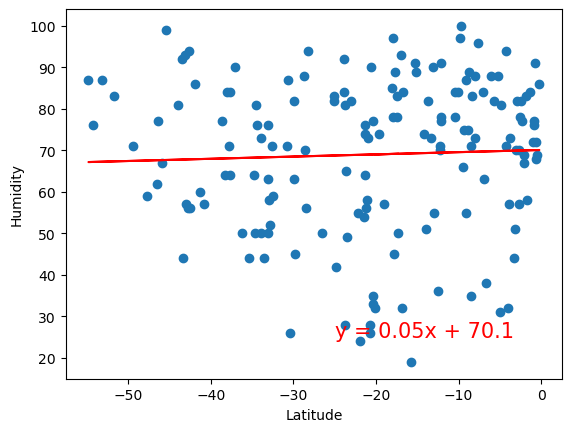

In [104]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r^2-value is {rvalue}')
print("-----------------------------------")
print("Discussion about linear relationship:")
print("In the Southern Hemisphere there is a slightly positive relationship as humidity increases as latitude reaches 0.")

The r^2-value is -0.07744466072646346


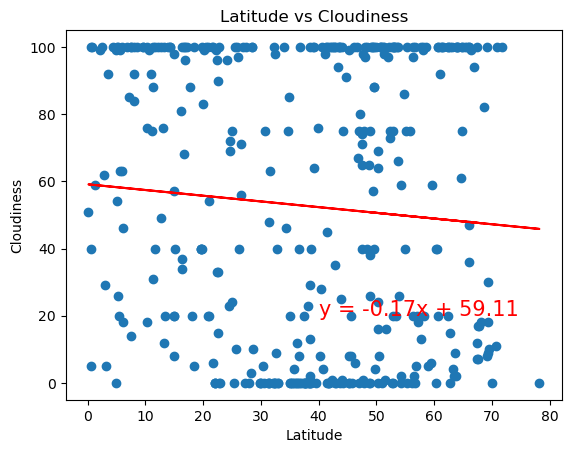

In [84]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r^2-value is {rvalue}')

The r^2-value is -0.07250431046045983
-----------------------------------
Discussions about the linear relationship:
There is little to no linear relationship between cloudiness and latitude since the data is pretty split.


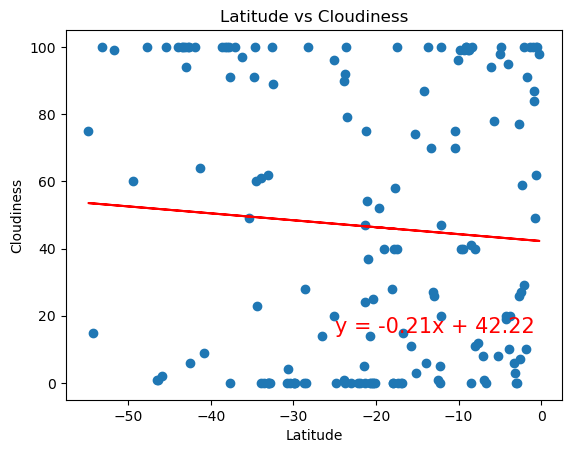

In [102]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r^2-value is {rvalue}')
print("-----------------------------------")
print("Discussions about the linear relationship:")
print("There is little to no linear relationship between cloudiness and latitude since the data is pretty split.")

The r^2-value is -0.18068893405954586


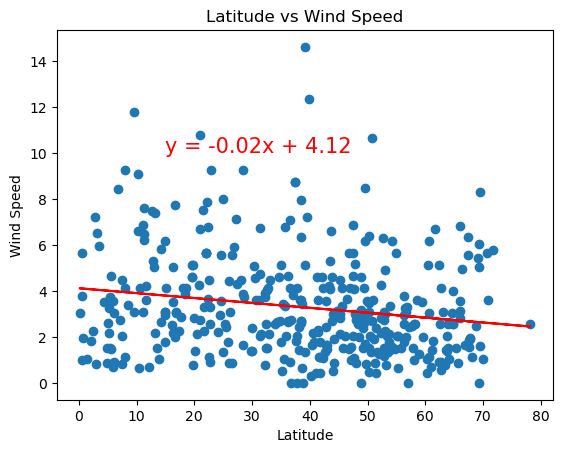

In [92]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r^2-value is {rvalue}')


The r^2-value is -0.1875799851171161
-----------------------------------
Discussions about the linear relationship:
In the Southern Hemisphere there appears to be a slight negative linear relationship as wind speed goes down as latitude reaches 0


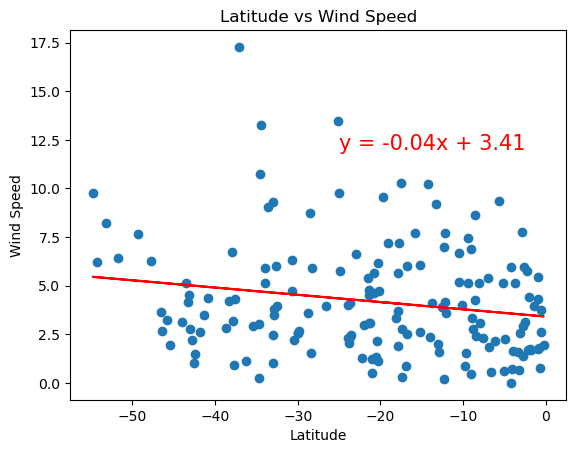

In [100]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r^2-value is {rvalue}')
print("-----------------------------------")
print("Discussions about the linear relationship:")
print("In the Southern Hemisphere there appears to be a slight negative linear relationship as wind speed goes down as latitude reaches 0")